In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mounting Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Reading Dataset
airbnb = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
airbnb.head()

Mounted at /content/drive


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
# Data Exploration
print("Dataset Shape:", airbnb.shape)
print("\nDataset Columns:")
print(airbnb.columns.tolist())
print("\nDataset Info:")
airbnb.info()

Dataset Shape: (102599, 26)

Dataset Columns:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  obje

In [5]:
# Check missing values
missing_values = airbnb.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
NAME                                 270
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        54843
license                           102597
dtype: int64


In [6]:
# Data Cleaning
# Handle price and service fee columns - convert to numeric
airbnb['price'] = pd.to_numeric(airbnb['price'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
airbnb['service fee'] = pd.to_numeric(airbnb['service fee'].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')

# Fill missing values
airbnb['reviews per month'] = airbnb['reviews per month'].fillna(0)
airbnb['Construction year'] = airbnb['Construction year'].fillna(0)
airbnb['review rate number'] = airbnb['review rate number'].fillna(0)

print("Basic statistics after cleaning:")
print(f"Total listings: {len(airbnb)}")
print(f"Average price: ${airbnb['price'].mean():.2f}")

Basic statistics after cleaning:
Total listings: 102599
Average price: $625.29


=== QUESTION 1: Different Property Types ===
Property Types (Room Types):
room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


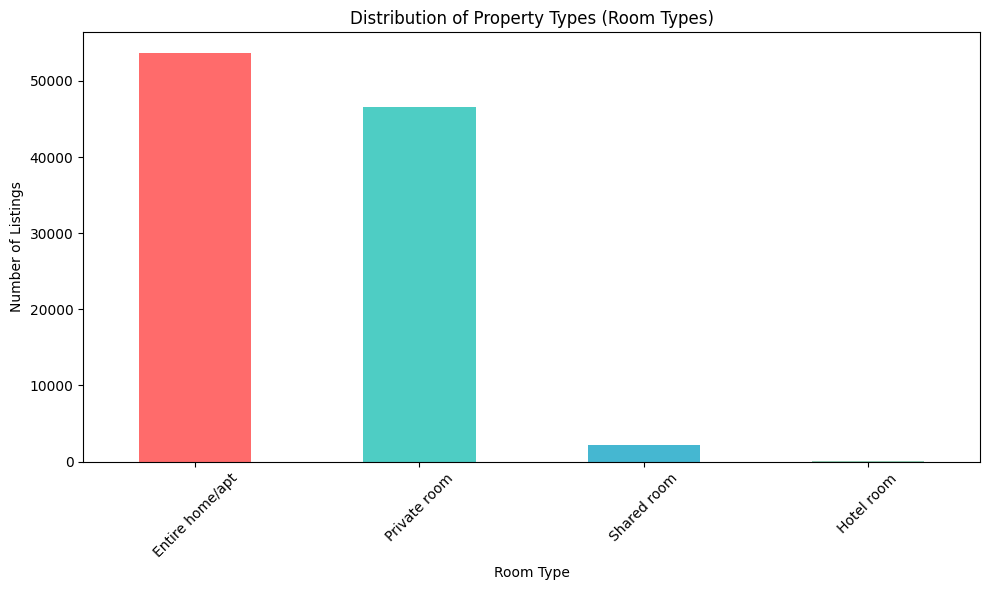


Total different property types: 4


In [7]:
# 1. What are the different property types in the Dataset?
print("=== QUESTION 1: Different Property Types ===")
property_types = airbnb['room type'].value_counts()
print("Property Types (Room Types):")
print(property_types)

plt.figure(figsize=(10, 6))
property_types.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Distribution of Property Types (Room Types)')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nTotal different property types: {len(property_types)}")


=== QUESTION 2: Neighborhood Group with Highest Listings ===
Listings by Neighborhood Group:
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


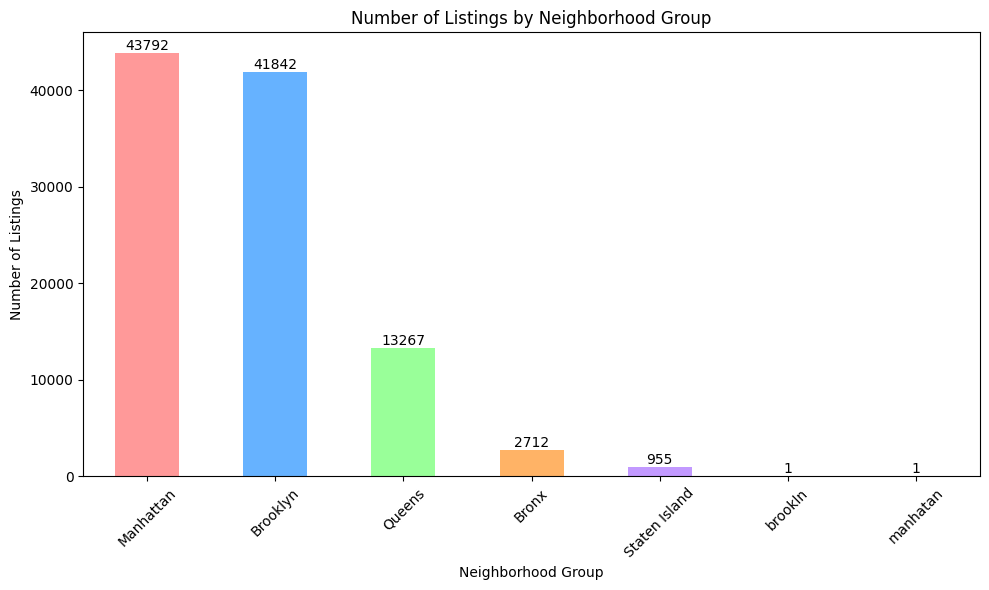


Neighborhood group with highest listings: Manhattan (43792 listings)


In [8]:
# 2. Which neighborhood group has the highest number of listings?
print("\n=== QUESTION 2: Neighborhood Group with Highest Listings ===")
neighbourhood_counts = airbnb['neighbourhood group'].value_counts()
print("Listings by Neighborhood Group:")
print(neighbourhood_counts)

plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFB366', '#C299FF'])
plt.title('Number of Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(neighbourhood_counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

max_neighbourhood = neighbourhood_counts.idxmax()
print(f"\nNeighborhood group with highest listings: {max_neighbourhood} ({neighbourhood_counts.max()} listings)")


=== QUESTION 3: Neighborhood Groups with Highest Average Prices ===
Average Prices by Neighborhood Group:
                       mean  median  count
neighbourhood group                       
Queens               630.21   628.0  13234
Bronx                627.77   633.0   2705
Brooklyn             626.56   626.0  41749
Staten Island        624.49   628.0    952
Manhattan            622.44   621.0  43682
brookln              580.00   580.0      1
manhatan             460.00   460.0      1


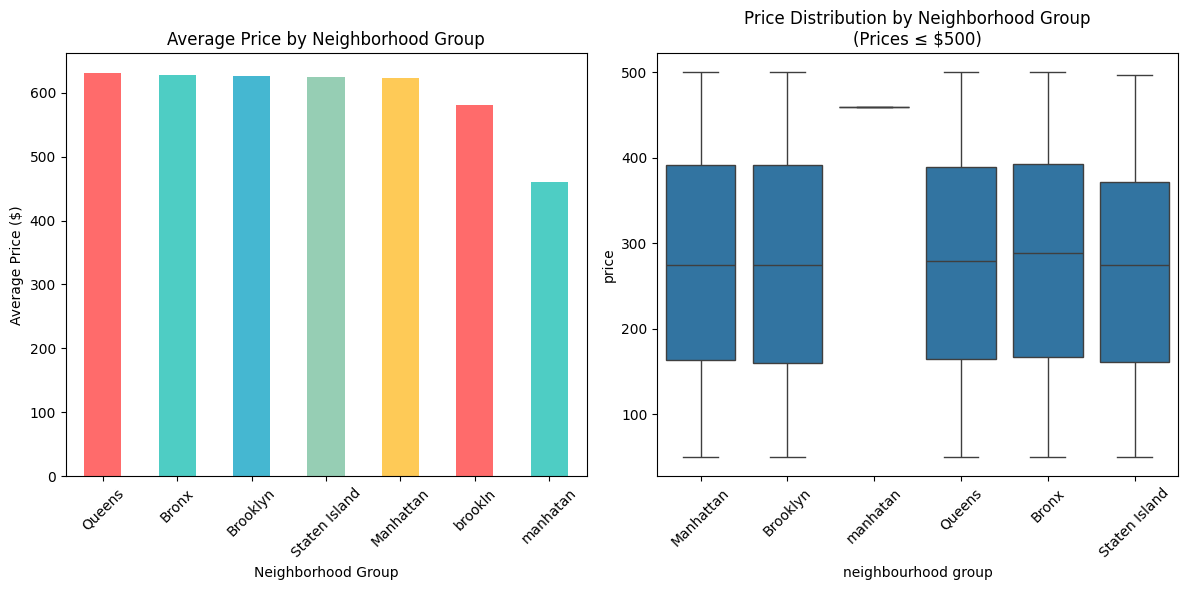


Neighborhood group with highest average price: Queens ($630.21)


In [9]:
# 3. Which neighborhoods group have the highest average prices for Airbnb listings?
print("\n=== QUESTION 3: Neighborhood Groups with Highest Average Prices ===")
avg_prices = airbnb.groupby('neighbourhood group')['price'].agg(['mean', 'median', 'count']).round(2)
avg_prices = avg_prices.sort_values('mean', ascending=False)
print("Average Prices by Neighborhood Group:")
print(avg_prices)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
avg_prices['mean'].plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Boxplot to show price distribution (filtering extreme values for better visualization)
price_filtered = airbnb[airbnb['price'] <= 500]  # Remove extreme outliers for better visualization
sns.boxplot(data=price_filtered, x='neighbourhood group', y='price')
plt.title('Price Distribution by Neighborhood Group\n(Prices ≤ $500)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

max_price_neighbourhood = avg_prices['mean'].idxmax()
print(f"\nNeighborhood group with highest average price: {max_price_neighbourhood} (${avg_prices['mean'].max():.2f})")


=== QUESTION 4: Relationship between Construction Year and Price ===
Properties with valid construction year: 102385
Construction year range: 2003.0 - 2022.0


/tmp/ipython-input-2225610254.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_construction['construction_decade'] = (valid_construction['Construction year'] // 10) * 10


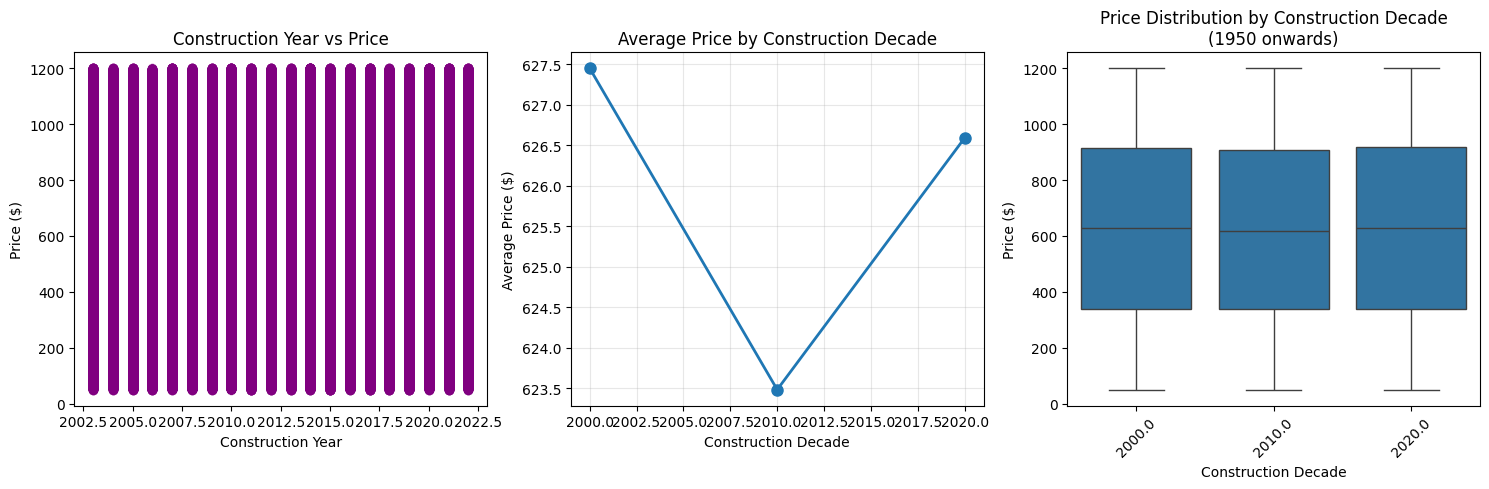


Correlation between construction year and price: -0.004
There is very little to no relationship between construction year and price.


In [10]:
# 4. Is there a relationship between the construction year of property and price?
print("\n=== QUESTION 4: Relationship between Construction Year and Price ===")

# Filter out invalid construction years
valid_construction = airbnb[(airbnb['Construction year'] > 1900) & (airbnb['Construction year'] <= 2023)]

print(f"Properties with valid construction year: {len(valid_construction)}")
print(f"Construction year range: {valid_construction['Construction year'].min()} - {valid_construction['Construction year'].max()}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Scatter plot
plt.scatter(valid_construction['Construction year'], valid_construction['price'], alpha=0.5, color='purple')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')
plt.title('Construction Year vs Price')

plt.subplot(1, 3, 2)
# Average price by construction decade
valid_construction['construction_decade'] = (valid_construction['Construction year'] // 10) * 10
decade_prices = valid_construction.groupby('construction_decade')['price'].mean().reset_index()
plt.plot(decade_prices['construction_decade'], decade_prices['price'], marker='o', linewidth=2, markersize=8)
plt.xlabel('Construction Decade')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Construction Decade')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
# Boxplot for recent decades
recent_properties = valid_construction[valid_construction['Construction year'] >= 1950]
sns.boxplot(data=recent_properties, x='construction_decade', y='price')
plt.xlabel('Construction Decade')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Construction Decade\n(1950 onwards)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = valid_construction['Construction year'].corr(valid_construction['price'])
print(f"\nCorrelation between construction year and price: {correlation:.3f}")

if abs(correlation) > 0.1:
    direction = "positive" if correlation > 0 else "negative"
    strength = "weak" if abs(correlation) < 0.3 else "moderate" if abs(correlation) < 0.7 else "strong"
    print(f"There is a {strength} {direction} relationship between construction year and price.")
else:
    print("There is very little to no relationship between construction year and price.")


=== QUESTION 5: Top 10 Hosts by Calculated Host Listing Count ===
Top 10 Hosts by Listing Count:
        host name  calculated host listings count neighbourhood group  \
85898  Blueground                           332.0           Manhattan   
97714  Blueground                           332.0           Manhattan   
63607  Blueground                           332.0           Manhattan   
7153   Blueground                           332.0           Manhattan   
3344   Blueground                           332.0           Manhattan   
3299   Blueground                           332.0           Manhattan   
62966  Blueground                           332.0           Manhattan   
63832  Blueground                           332.0           Manhattan   
18977  Blueground                           332.0           Manhattan   
20748  Blueground                           332.0           Manhattan   

       review rate number  
85898                 2.0  
97714                 2.0  
63607         

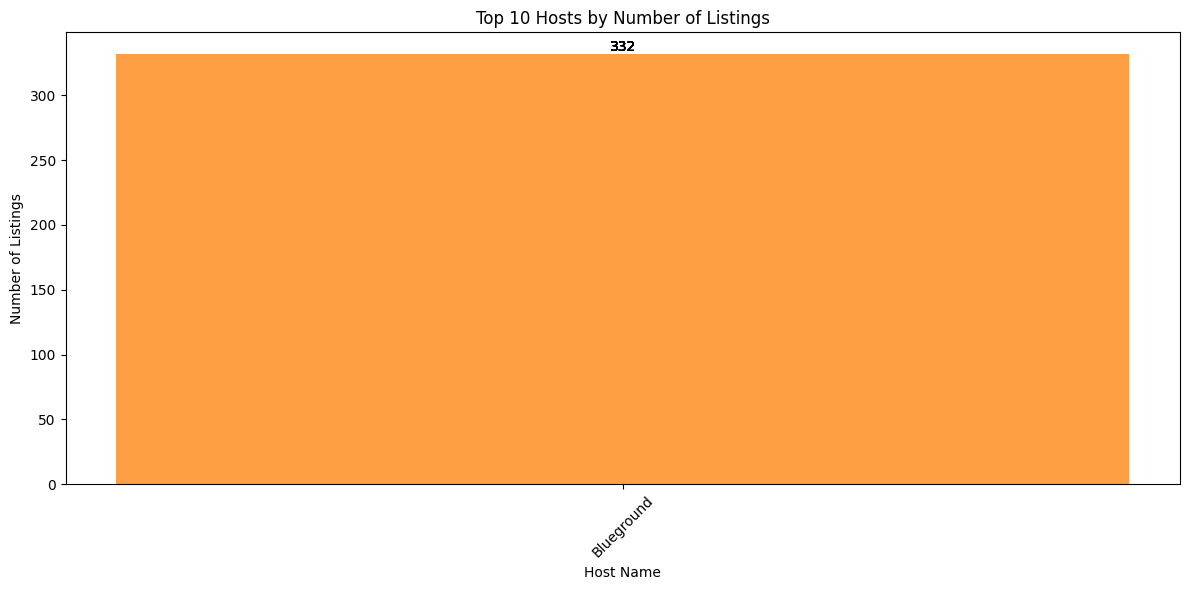


Host with most listings: Blueground with 332.0 listings


In [11]:
# 5. Who are the top 10 hosts by calculated host listing count?
print("\n=== QUESTION 5: Top 10 Hosts by Calculated Host Listing Count ===")

top_hosts = airbnb.groupby(['host id', 'host name']).agg({
    'calculated host listings count': 'max',
    'neighbourhood group': 'first',
    'review rate number': 'mean'
}).reset_index()

top_hosts = top_hosts.sort_values('calculated host listings count', ascending=False).head(10)

print("Top 10 Hosts by Listing Count:")
print(top_hosts[['host name', 'calculated host listings count', 'neighbourhood group', 'review rate number']])

plt.figure(figsize=(12, 6))
bars = plt.bar(top_hosts['host name'].astype(str), top_hosts['calculated host listings count'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43'])
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.title('Top 10 Hosts by Number of Listings')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nHost with most listings: {top_hosts.iloc[0]['host name']} with {top_hosts.iloc[0]['calculated host listings count']} listings")


=== QUESTION 6: Host Identity Verification vs Review Ratings ===
Review Performance by Host Identity Verification Status:
                       review rate number               number of reviews
                                     mean median  count              mean
host_identity_verified                                                   
unconfirmed                         3.261    3.0  51200            27.542
verified                            3.278    3.0  51110            27.319


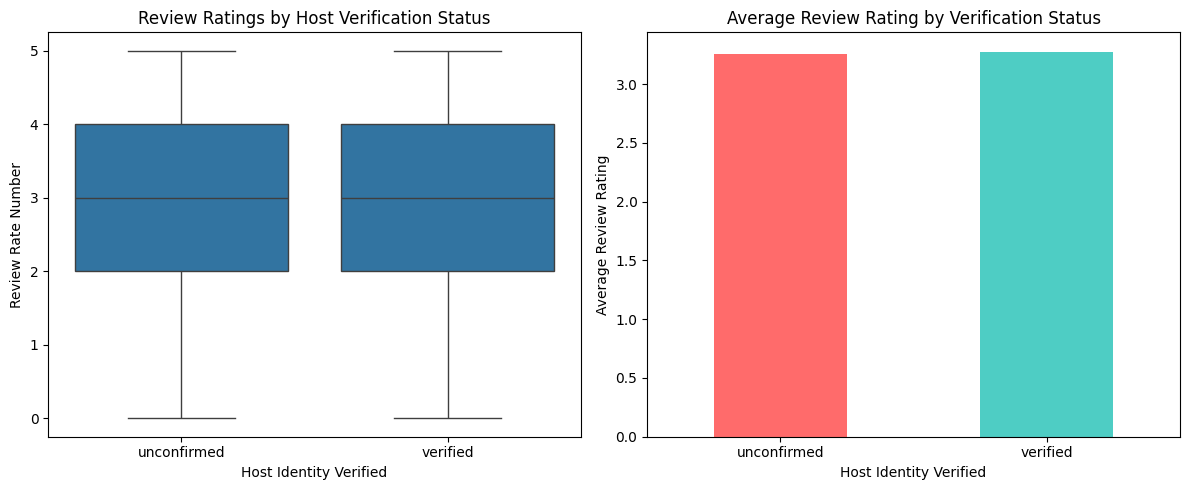


Average review rating for verified hosts: 3.278
Average review rating for unverified hosts: 3.261
Difference: 0.017
Verified hosts receive slightly better reviews.


In [12]:
# 6. Are hosts with verified identities more likely to receive positive reviews?
print("\n=== QUESTION 6: Host Identity Verification vs Review Ratings ===")

# Analyze review ratings by verification status
verification_reviews = airbnb.groupby('host_identity_verified').agg({
    'review rate number': ['mean', 'median', 'count'],
    'number of reviews': 'mean'
}).round(3)

print("Review Performance by Host Identity Verification Status:")
print(verification_reviews)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Boxplot of review ratings by verification status
sns.boxplot(data=airbnb, x='host_identity_verified', y='review rate number')
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Review Ratings by Host Verification Status')

plt.subplot(1, 2, 2)
# Average review rating comparison
verification_reviews['review rate number']['mean'].plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Verification Status')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Statistical test (simple difference)
verified_mean = airbnb[airbnb['host_identity_verified'] == 'verified']['review rate number'].mean()
unverified_mean = airbnb[airbnb['host_identity_verified'] == 'unconfirmed']['review rate number'].mean()
difference = verified_mean - unverified_mean

print(f"\nAverage review rating for verified hosts: {verified_mean:.3f}")
print(f"Average review rating for unverified hosts: {unverified_mean:.3f}")
print(f"Difference: {difference:.3f}")

if difference > 0.1:
    print("Verified hosts tend to receive significantly better reviews.")
elif difference > 0:
    print("Verified hosts receive slightly better reviews.")
else:
    print("No significant difference in review ratings based on verification status.")


=== QUESTION 7: Correlation between Price and Service Fee ===


/tmp/ipython-input-202313972.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_fee_data['fee_percentage'] = (price_fee_data['service fee'] / price_fee_data['price']) * 100
/tmp/ipython-input-202313972.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_fee_data['price_range'] = pd.cut(price_fee_data['price'], bins=10)
/tmp/ipython-input-202313972.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

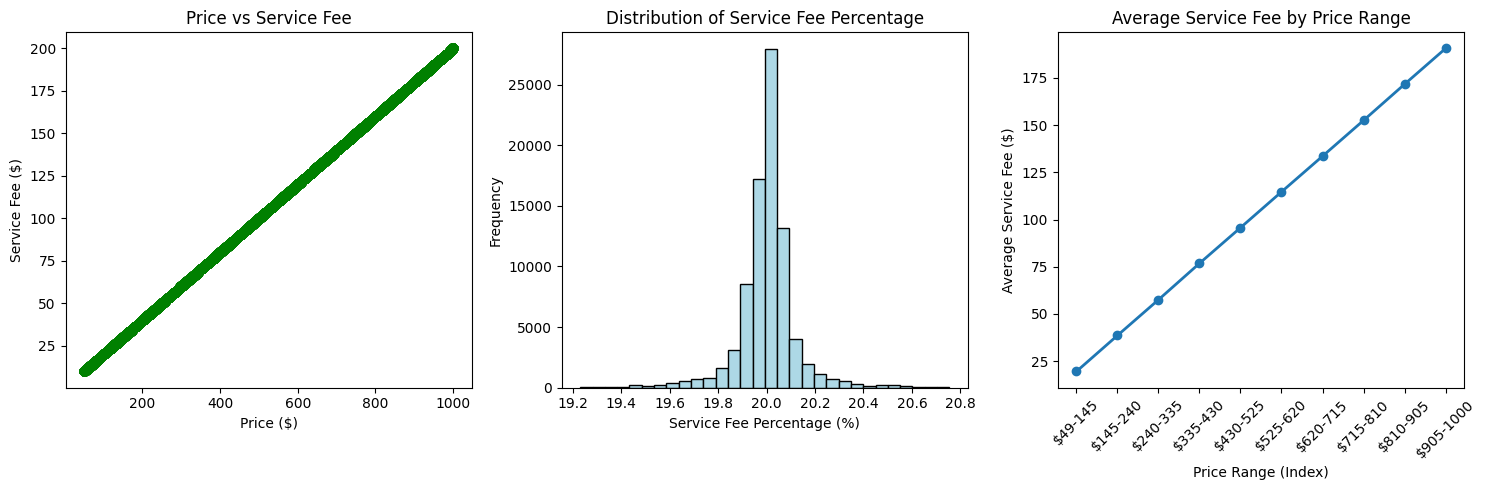

Correlation between price and service fee: 1.000
Average service fee as percentage of price: 20.00%
There is a strong positive correlation between price and service fee.


In [13]:
# 7. Is there a correlation between the price of a listing and its service fee?
print("\n=== QUESTION 7: Correlation between Price and Service Fee ===")

# Remove outliers for better visualization
price_fee_data = airbnb[(airbnb['price'] <= 1000) & (airbnb['service fee'] <= 200)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Scatter plot
plt.scatter(price_fee_data['price'], price_fee_data['service fee'], alpha=0.5, color='green')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Price vs Service Fee')

plt.subplot(1, 3, 2)
# Calculate service fee as percentage of price
price_fee_data['fee_percentage'] = (price_fee_data['service fee'] / price_fee_data['price']) * 100
reasonable_percentage = price_fee_data[price_fee_data['fee_percentage'] <= 50]  # Remove unreasonable percentages
plt.hist(reasonable_percentage['fee_percentage'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Service Fee Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Service Fee Percentage')

plt.subplot(1, 3, 3)
# Service fee by price ranges
price_fee_data['price_range'] = pd.cut(price_fee_data['price'], bins=10)
fee_by_price_range = price_fee_data.groupby('price_range')['service fee'].mean().reset_index()
plt.plot(range(len(fee_by_price_range)), fee_by_price_range['service fee'], marker='o', linewidth=2, markersize=6)
plt.xlabel('Price Range (Index)')
plt.ylabel('Average Service Fee ($)')
plt.title('Average Service Fee by Price Range')
plt.xticks(range(len(fee_by_price_range)), [f'${int(interval.left)}-{int(interval.right)}' for interval in fee_by_price_range['price_range']], rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = airbnb['price'].corr(airbnb['service fee'])
print(f"Correlation between price and service fee: {correlation:.3f}")

# Service fee as percentage analysis
avg_fee_percentage = reasonable_percentage['fee_percentage'].mean()
print(f"Average service fee as percentage of price: {avg_fee_percentage:.2f}%")

if correlation > 0.7:
    print("There is a strong positive correlation between price and service fee.")
elif correlation > 0.3:
    print("There is a moderate positive correlation between price and service fee.")
else:
    print("The correlation between price and service fee is weak.")


=== QUESTION 8: Average Review Rate Number Analysis ===
Overall average review rate number: 3.27/5

Review Ratings by Neighborhood Group and Room Type:
                                      mean  count
neighbourhood group room type                    
Bronx               Entire home/apt  3.327   1022
                    Private room     3.306   1573
                    Shared room      3.265    117
Brooklyn            Entire home/apt  3.241  20575
                    Hotel room       3.750      8
                    Private room     3.255  20434
                    Shared room      3.325    825
Manhattan           Entire home/apt  3.265  26473
                    Hotel room       3.500    100
                    Private room     3.266  16312
                    Shared room      3.250    907
Queens              Entire home/apt  3.346   5146
                    Hotel room       3.750      8
                    Private room     3.302   7751
                    Shared room      3.359    3

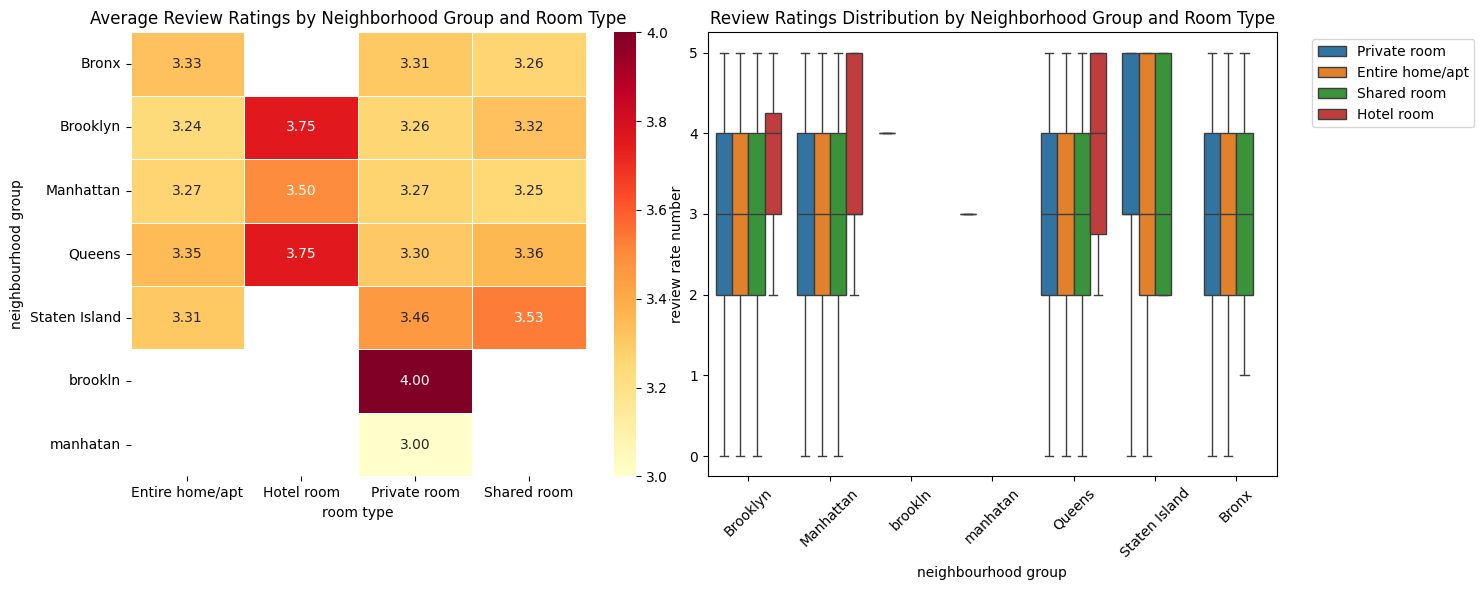


Best review combination: ('brookln', 'Private room') - Rating: 4.00/5
Worst review combination: ('manhatan', 'Private room') - Rating: 3.00/5


In [14]:
# 8. What is the average review rate number, and does it vary based on the neighborhood group and room type?
print("\n=== QUESTION 8: Average Review Rate Number Analysis ===")

overall_avg_review = airbnb['review rate number'].mean()
print(f"Overall average review rate number: {overall_avg_review:.2f}/5")

# Review ratings by neighborhood group and room type
review_by_group_room = airbnb.groupby(['neighbourhood group', 'room type'])['review rate number'].agg(['mean', 'count']).round(3)
print("\nReview Ratings by Neighborhood Group and Room Type:")
print(review_by_group_room)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Heatmap of average review ratings
pivot_reviews = airbnb.pivot_table(values='review rate number',
                                   index='neighbourhood group',
                                   columns='room type',
                                   aggfunc='mean')
sns.heatmap(pivot_reviews, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title('Average Review Ratings by Neighborhood Group and Room Type')
plt.tight_layout()

plt.subplot(1, 2, 2)
# Boxplot of review ratings
sns.boxplot(data=airbnb, x='neighbourhood group', y='review rate number', hue='room type')
plt.title('Review Ratings Distribution by Neighborhood Group and Room Type')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Find best and worst performing combinations
max_review = review_by_group_room['mean'].max()
min_review = review_by_group_room['mean'].min()
best_combo = review_by_group_room[review_by_group_room['mean'] == max_review].index[0]
worst_combo = review_by_group_room[review_by_group_room['mean'] == min_review].index[0]

print(f"\nBest review combination: {best_combo} - Rating: {max_review:.2f}/5")
print(f"Worst review combination: {worst_combo} - Rating: {min_review:.2f}/5")


=== QUESTION 9: Host Listings Count vs Availability ===
Availability by Host Size Category:
              availability 365               calculated host listings count
                          mean median  count                           mean
host_size                                                                  
Single                  114.70   62.0  63153                           1.00
Small (2-5)             159.25  139.0  26437                           2.74
Medium (6-20)           233.86  276.0   6478                           9.53
Large (20+)             242.68  283.0   5764                         106.23


/tmp/ipython-input-4252052515.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  availability_by_host_size = airbnb.groupby('host_size').agg({


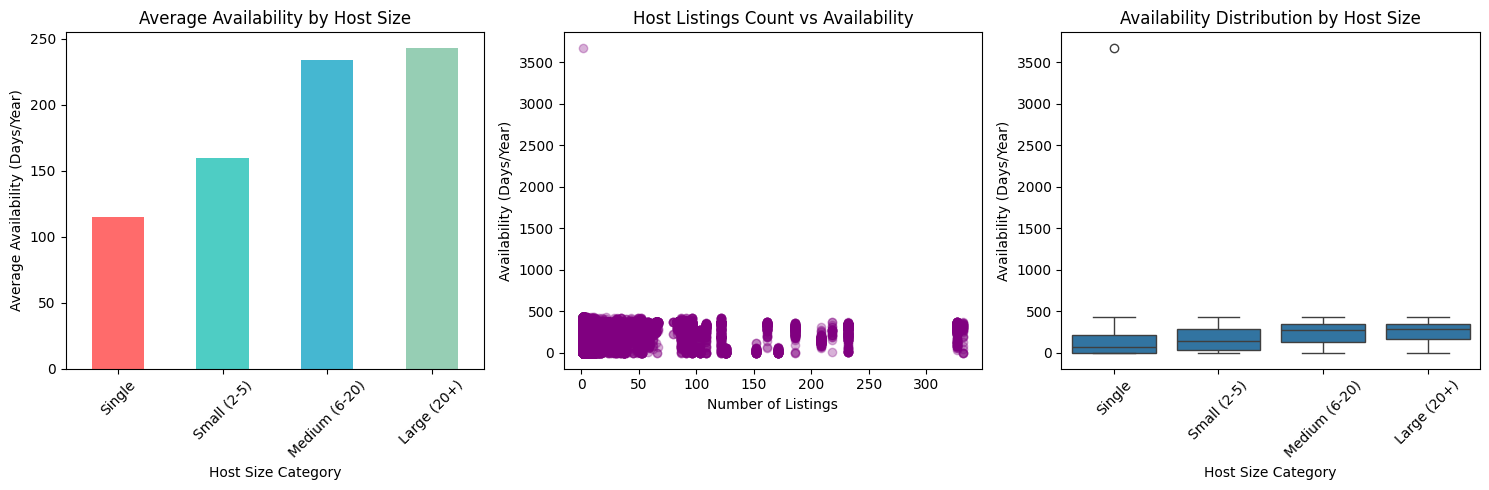


Correlation between host listings count and availability: 0.159
Hosts with more listings tend to have higher availability throughout the year.


In [16]:
# 9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
print("\n=== QUESTION 9: Host Listings Count vs Availability ===")

# Categorize hosts by listing count
airbnb['host_size'] = pd.cut(airbnb['calculated host listings count'],
                             bins=[0, 1, 5, 20, 1000],
                             labels=['Single', 'Small (2-5)', 'Medium (6-20)', 'Large (20+)'])

availability_by_host_size = airbnb.groupby('host_size').agg({
    'availability 365': ['mean', 'median', 'count'],
    'calculated host listings count': 'mean'
}).round(2)

print("Availability by Host Size Category:")
print(availability_by_host_size)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Average availability by host size
availability_by_host_size['availability 365']['mean'].plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.xlabel('Host Size Category')
plt.ylabel('Average Availability (Days/Year)')
plt.title('Average Availability by Host Size')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
# Scatter plot
plt.scatter(airbnb['calculated host listings count'], airbnb['availability 365'], alpha=0.3, color='purple')
plt.xlabel('Number of Listings')
plt.ylabel('Availability (Days/Year)')
plt.title('Host Listings Count vs Availability')

plt.subplot(1, 3, 3)
# Boxplot of availability by host size
sns.boxplot(data=airbnb, x='host_size', y='availability 365')
plt.xlabel('Host Size Category')
plt.ylabel('Availability (Days/Year)')
plt.title('Availability Distribution by Host Size')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = airbnb['calculated host listings count'].corr(airbnb['availability 365'])
print(f"\nCorrelation between host listings count and availability: {correlation:.3f}")

if correlation > 0.1:
    print("Hosts with more listings tend to have higher availability throughout the year.")
elif correlation < -0.1:
    print("Hosts with more listings tend to have lower availability throughout the year.")
else:
    print("There is little to no correlation between number of listings and availability.")